## Run the cell below

In [1]:
import pylab as py
import numpy as np
import math
import matplotlib.pyplot as plt

# Assignment 4 - Question 6

## Bifurcations 

In [2]:
C = 10 #mF
gL = 19 #mS
eL = -67 #mV
gNa = 74 #mS
Vstar = 1.5 #mV
k = 16
eNa = 60 #mV
V = list(np.linspace(-130,50,181))

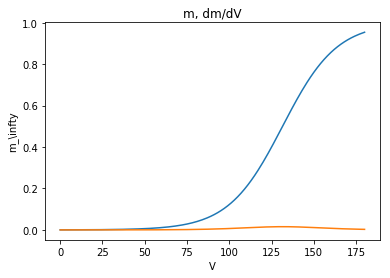

In [3]:
m_values = []
m_derivative_values = []
derivative_values = []

for v in V:
    m = 1/(1+math.exp((Vstar-v)/k))
    m1 = math.exp((1.5-v)/16)/(16*(1+math.exp((1.5-v)/16))**2)
    m_values.append(m)
    m_derivative_values.append(m1)  
    derivative_values1 = (-gL-(gNa*(m+(v-eNa)*m1)))/C
    derivative_values.append(derivative_values1)
    
py.xlabel('V')
py.ylabel('m_\infty')
py.title('m, dm/dV')
py.plot(m_values)
py.plot(m_derivative_values)

In [16]:
bifurcation_i = []

for i in range(len(V)):
    iv = gL*(V[i]-eL)+gNa*(m_values[i])*(V[i]-eNa)  
    bifurcation_i.append(iv)
    
print('I values that yield bifurcation points =', bifurcation_i)

I values that yield bifurcation points = [-1200.7888769271576, -1182.011941196271, -1163.2480143435403, -1144.4978460263833, -1125.762228426145, -1107.04199860716, -1088.3380410022596, -1069.6512900310977, -1050.9827328579538, -1032.333412295965, -1013.7044298650314, -995.0969490109496, -976.5121984936359, -957.9514759526229, -939.4161516583338, -920.9076724579654, -902.4275659251452, -883.9774447228529, -865.5590111894346, -847.1740621578657, -828.8244940187387, -810.5123080377804, -792.2396159389995, -774.0086457648715, -755.8217480252347, -737.6814021468358, -719.5902232356856, -701.5509691645832, -683.5665479983243, -665.6400257692162, -647.774634615578, -629.9737812958923, -612.2410560911927, -594.5802421080908, -576.9953249945829, -559.4905030803792, -542.0701979529834, -524.7390654800766, -507.50200728791776, -490.364182704439, -473.3310211744551, -456.4082351529074, -439.6018334802779, -422.9181352422168, -406.36378411298205, -389.9457631794497, -373.67141023918094, -357.548433

In [17]:
monostable_i_values = []
monostable_v_values = []
bistable_i_values = []
bistable_v_values = []

for i in range(len(derivative_values)):
    if derivative_values[i] <= 0: 
        monostable_i_values.append(bifurcation_i[i])
        monostable_v_values.append(V[i])
    else: 
        bistable_i_values.append(bifurcation_i[i])
        bistable_v_values.append(V[i])
 
print('Monostable equilbrium values =', monostable_i_values)
print('Bistable equilbrium values =', bistable_i_values)

Monostable equilbrium values = [-1200.7888769271576, -1182.011941196271, -1163.2480143435403, -1144.4978460263833, -1125.762228426145, -1107.04199860716, -1088.3380410022596, -1069.6512900310977, -1050.9827328579538, -1032.333412295965, -1013.7044298650314, -995.0969490109496, -976.5121984936359, -957.9514759526229, -939.4161516583338, -920.9076724579654, -902.4275659251452, -883.9774447228529, -865.5590111894346, -847.1740621578657, -828.8244940187387, -810.5123080377804, -792.2396159389995, -774.0086457648715, -755.8217480252347, -737.6814021468358, -719.5902232356856, -701.5509691645832, -683.5665479983243, -665.6400257692162, -647.774634615578, -629.9737812958923, -612.2410560911927, -594.5802421080908, -576.9953249945829, -559.4905030803792, -542.0701979529834, -524.7390654800766, -507.50200728791776, -490.364182704439, -473.3310211744551, -456.4082351529074, -439.6018334802779, -422.9181352422168, -406.36378411298205, -389.9457631794497, -373.67141023918094, -357.54843356226644, 

Monostable values are plotted in BLUE and bistable values are plotted in RED


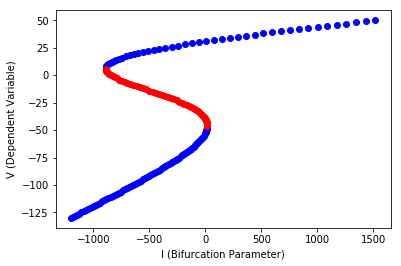

In [20]:
plt.scatter(monostable_i_values,monostable_v_values, color = 'b')
plt.scatter(bistable_i_values,bistable_v_values, color = 'r')
py.xlabel('I (Bifurcation Parameter)')
py.ylabel('V (Dependent Variable)')
print('Monostable values are plotted in BLUE and bistable values are plotted in RED')

In [7]:
monostable_1 = []
monostable_2 = []
bistable_1 = [ ]

for n in range(len(V)): 
    m = 1/(1+math.exp((Vstar-V[n])/k))
    monostable_1_to_plot = (monostable_i_values[0]-gL*(V[n]-eL)-gNa*(m_values[n])*(V[n]-eNa))/C 
    monostable_2_to_plot = (monostable_i_values[20]-gL*(V[n]-eL)-gNa*(m_values[n])*(V[n]-eNa))/C 
    bistable_1_to_plot = (bistable_i_values[0]-gL*(V[n]-eL)-gNa*(m_values[n])*(V[n]-eNa))/C 
    monostable_1.append(monostable_1_to_plot)
    monostable_2.append(monostable_2_to_plot)
    bistable_1.append(bistable_1_to_plot)

Text(0.5,1,'differential equation vs. V')

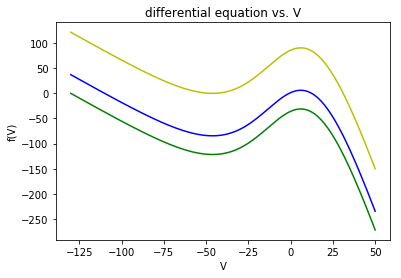

In [8]:
py.plot(V,monostable_1,'g') # Monostable 1
py.plot(V,monostable_2,'b') # Monostable 2 
py.plot(V,bistable_1,'y') # Bistable 
py.xlabel('V')
py.ylabel('f(V)')
py.title('differential equation vs. V')